In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

import warnings;
warnings.filterwarnings('ignore');

In [46]:
df = pd.read_csv('Products.csv',  engine='python')
df.head()

,Unnamed: 0,id,product_name,category,product_description,price,location
0,0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire"
1,1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland"
2,2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire"
3,3,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset"
4,4,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,"Home & Garden / Dining, Living Room Furniture ...",New Design Shannon Corner sofa 5 Seater Avail...,None,None


In [24]:
df.columns

Index(['Unnamed: 0', 'id', 'product_name', 'category', 'product_description',
       'price', 'location'],
      dtype='object')

In [25]:
df.shape

(11318, 7)

In [26]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)
df.head()

,id,product_name,category,product_description,price,location
0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire"
1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland"
2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire"
3,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset"
4,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,"Home & Garden / Dining, Living Room Furniture ...",New Design Shannon Corner sofa 5 Seater Avail...,None,None


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11318 entries, 0 to 11317
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   8001 non-null   object
 1   product_name         8001 non-null   object
 2   category             7156 non-null   object
 3   product_description  7156 non-null   object
 4   price                6311 non-null   object
 5   location             6311 non-null   object
dtypes: object(6)
memory usage: 530.7+ KB


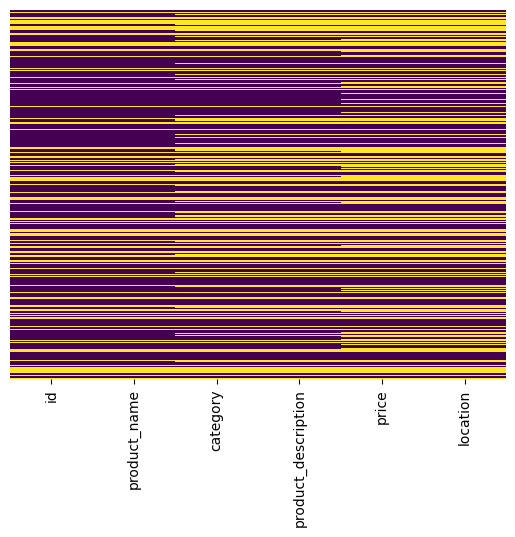

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [29]:
df.isna().sum()

id                     3317
product_name           3317
category               4162
product_description    4162
price                  5007
location               5007
dtype: int64

In [30]:
df=df.dropna()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 0 to 11317
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   6311 non-null   object
 1   product_name         6311 non-null   object
 2   category             6311 non-null   object
 3   product_description  6311 non-null   object
 4   price                6311 non-null   object
 5   location             6311 non-null   object
dtypes: object(6)
memory usage: 345.1+ KB


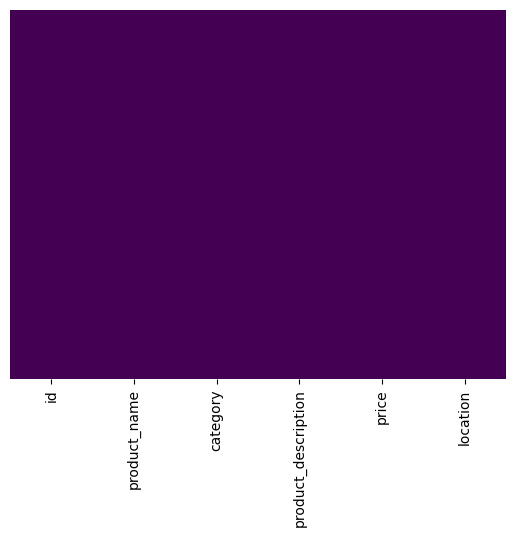

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [36]:
df['price'].iloc[2]

'£20.00'

In [38]:
df['price'].head(10)

0       £5.00
1      £20.00
2      £20.00
3     £115.00
12      £9.00
13    £419.00
14     £10.00
15     £50.00
16    £200.00
17    £449.00
Name: price, dtype: object

In [39]:
float(df['price'].iloc[2].strip('£'))

20.0

In [41]:
df['price']=df['price'].apply(lambda x:str(x).strip('£') if x else None)

In [42]:
df['price'].head(5)

0       5.00
1      20.00
2      20.00
3     115.00
12      9.00
Name: price, dtype: object

In [43]:
df.head(10)

,id,product_name,category,product_description,price,location
0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",5.00,"Wokingham, Berkshire"
1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,20.00,"Inverness, Highland"
2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,20.00,"Skegness, Lincolnshire"
3,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,115.00,"Radstock, Somerset"
12,5707be4f-49d9-4feb-b2c8-aa0868405c65,"Spotlights | in Newent, Gloucestershire | Gumtree",Home & Garden / Other Household Goods,New in box not needed Spotlights . Posted by s...,9.00,"Newent, Gloucestershire"
13,d2244a7b-aef4-4495-aff7-0c55bf512d6e,💥💥White Wardrobe💥💥Brand new Wardrobe For sale ...,Home & Garden / Beds & Bedroom Furniture / War...,🌈🌈Call Dustin 0208-0049437\r🌈🌈Same Day Or any...,419.00,"Huddersfield, West Yorkshire"
14,485edc04-7bbc-430a-9430-f05a77f5a917,"Letter cage | in Newent, Gloucestershire | Gum...",Home & Garden / Other Household Goods,Selling for family member brand new too big fo...,10.00,"Newent, Gloucestershire"
15,7e538445-c75e-4802-8dc5-a9083a802278,"Double Pine Bed Frame | in Lytham St Annes, La...",Home & Garden / Beds & Bedroom Furniture / Dou...,Double Pine bed frame good condition. Reasonab...,50.00,"Lytham St Annes, Lancashire"
16,1a64843d-72f3-4141-946f-fa9b978fe755,Solid pine dining table and chairs | in West K...,"Home & Garden / Dining, Living Room Furniture ...",Distressed solid pine table and 4 chairs In ex...,200.00,"West Kilbride, North Ayrshire"
17,ac514199-1ceb-4703-902d-4d8c55bea7e4,Vortex plush velvet corner or 3+2 sofa avialbl...,"Home & Garden / Dining, Living Room Furniture ...",corner Dimension:Width is 212cm x 164cmHeight ...,449.00,"Wigan, Manchester"
